<a href="https://colab.research.google.com/github/TarynXL/CS542-CC/blob/main/task1_XL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.8.0'

#### Load Image Data

In [5]:
!unzip "/content/Covid_Data_GradientCrescent.zip" -d "/content/Covid_Data_GradientCrescent"


Archive:  /content/Covid_Data_GradientCrescent.zip
   creating: /content/Covid_Data_GradientCrescent/Covid_Data_GradientCrescent/
  inflating: /content/Covid_Data_GradientCrescent/__MACOSX/._Covid_Data_GradientCrescent  
  inflating: /content/Covid_Data_GradientCrescent/Covid_Data_GradientCrescent/.DS_Store  
  inflating: /content/Covid_Data_GradientCrescent/__MACOSX/Covid_Data_GradientCrescent/._.DS_Store  
  inflating: /content/Covid_Data_GradientCrescent/Covid_Data_GradientCrescent/task1_XL.ipynb  
  inflating: /content/Covid_Data_GradientCrescent/__MACOSX/Covid_Data_GradientCrescent/._task1_XL.ipynb  
   creating: /content/Covid_Data_GradientCrescent/Covid_Data_GradientCrescent/all/
  inflating: /content/Covid_Data_GradientCrescent/__MACOSX/Covid_Data_GradientCrescent/._all  
   creating: /content/Covid_Data_GradientCrescent/Covid_Data_GradientCrescent/two/
  inflating: /content/Covid_Data_GradientCrescent/__MACOSX/Covid_Data_GradientCrescent/._two  
   creating: /content/Covid_Dat

In [6]:
DATA_LIST = os.listdir('/content/Covid_Data_GradientCrescent/Covid_Data_GradientCrescent/two/train')
DATASET_PATH  = '/content/Covid_Data_GradientCrescent/Covid_Data_GradientCrescent/two/train'
TEST_DIR =  '/content/Covid_Data_GradientCrescent/Covid_Data_GradientCrescent/two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [8]:
#raise NotImplementedError("Build your model based on an architecture of your choice "
#                          "A sample model summary is shown below")

#reference: https://www.tensorflow.org/tutorials/images/classification
from tensorflow import keras
from keras import models
from keras import layers
from keras.applications.resnet import ResNet50
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout

resnet = ResNet50(weights = 'imagenet', 
               include_top = False, 
               input_shape=(224, 224, 3))
resnet.trainable = False

model = models.Sequential()
model.add(resnet)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', name='dense_feature'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

model.build(input_shape=(224, 224, 3))
model.summary()
model.compile(optimizer='adam',
                    loss="binary_crossentropy", 
                    metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense_feature (Dense)       (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 49,278,337
Trainable params: 25,690,625
Non-trainable params: 23,587,712
____________________________________

#### [5 points] Train Model

In [9]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

#raise NotImplementedError("Use the model.fit function to train your network")

history = model.fit(
  train_batches,
  validation_data=valid_batches,
  validation_steps = STEP_SIZE_VALID,
  epochs=NUM_EPOCHS,
  verbose=1, 
  steps_per_epoch =STEP_SIZE_TRAIN   
)

11
3


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
10/10 [==============================] - 28s 2s/step - loss: 8.1003 - accuracy: 0.5000 - val_loss: 1.7289 - val_accuracy: 0.5500
Epoch 2/40
10/10 [==============================] - 23s 2s/step - loss: 1.2071 - accuracy: 0.4787 - val_loss: 0.7407 - val_accuracy: 0.6500
Epoch 3/40
10/10 [==============================] - 23s 2s/step - loss: 0.9720 - accuracy: 0.5745 - val_loss: 0.7417 - val_accuracy: 0.5500
Epoch 4/40
10/10 [==============================] - 23s 2s/step - loss: 1.3287 - accuracy: 0.4787 - val_loss: 1.0218 - val_accuracy: 0.4500
Epoch 5/40
10/10 [==============================] - 24s 2s/step - loss: 0.8401 - accuracy: 0.5300 - val_loss: 0.8696 - val_accuracy: 0.5500
Epoch 6/40
10/10 [==============================] - 23s 2s/step - loss: 0.6951 - accuracy: 0.5957 - val_loss: 0.7296 - val_accuracy: 0.5000
Epoch 7/40
10/10 [==============================] - 23s 2s/step - loss: 0.7382 - accuracy: 0.4681 - val_loss: 0.7342 - val_accuracy: 0.4000
Epoch 8/40
10/10 [==

#### [5 points] Plot Accuracy and Loss During Training

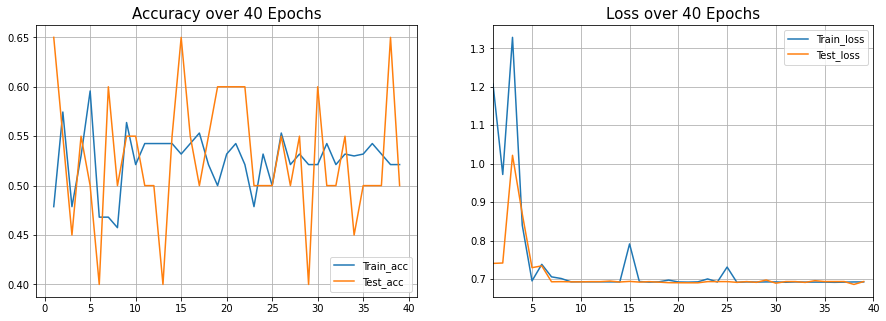

In [10]:
import matplotlib.pyplot as plt

#raise NotImplementedError("Plot the accuracy and the loss during training")

def plot_acc_loss(history, epochs):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    #plt.ylim(0.6, 1.01)
    #plt.xlim(1, epochs)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.xlim(1, epochs)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(history, NUM_EPOCHS)

#### Plot Test Results

Found 18 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


18/18 [==============================] - 6s 235ms/step
covid/nejmoa2001191_f3-PA.jpeg


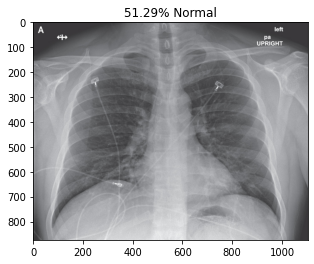

covid/nejmoa2001191_f4.jpeg


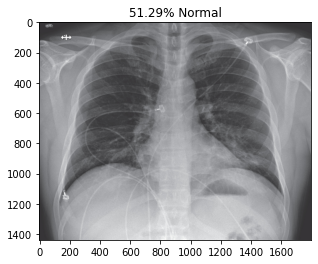

covid/nejmoa2001191_f5-PA.jpeg


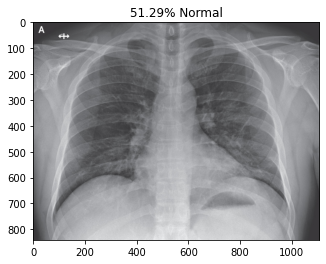

covid/radiol.2020200490.fig3.jpeg


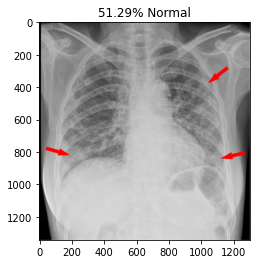

covid/ryct.2020200028.fig1a.jpeg


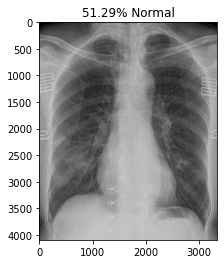

covid/ryct.2020200034.fig2.jpeg


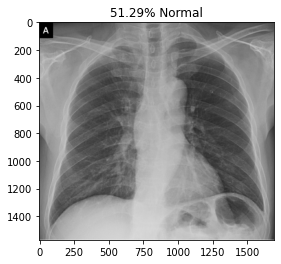

covid/ryct.2020200034.fig5-day0.jpeg


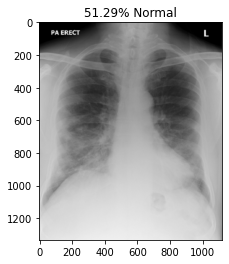

covid/ryct.2020200034.fig5-day4.jpeg


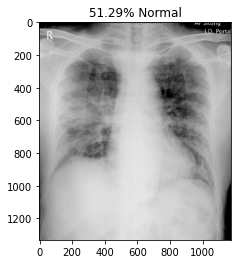

covid/ryct.2020200034.fig5-day7.jpeg


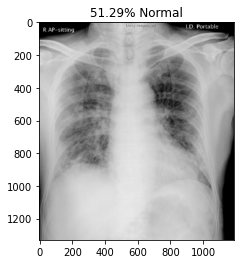

normal/NORMAL2-IM-1385-0001.jpeg


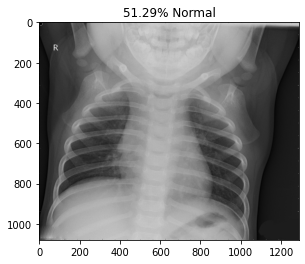

normal/NORMAL2-IM-1396-0001.jpeg


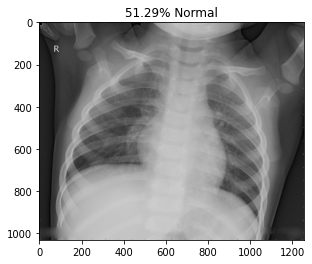

normal/NORMAL2-IM-1400-0001.jpeg


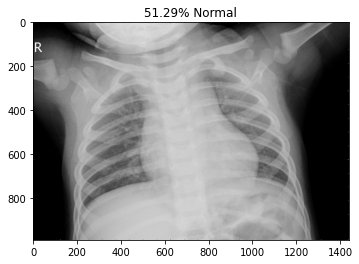

normal/NORMAL2-IM-1401-0001.jpeg


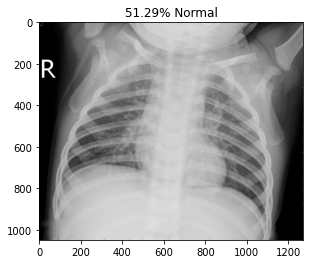

normal/NORMAL2-IM-1406-0001.jpeg


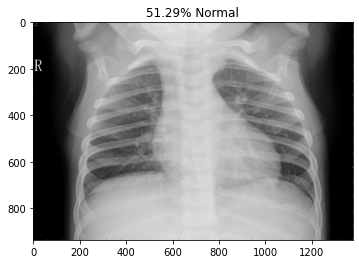

normal/NORMAL2-IM-1412-0001.jpeg


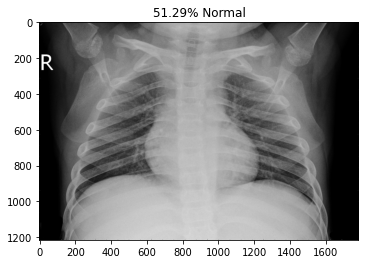

normal/NORMAL2-IM-1419-0001.jpeg


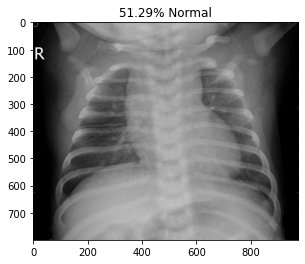

normal/NORMAL2-IM-1422-0001.jpeg


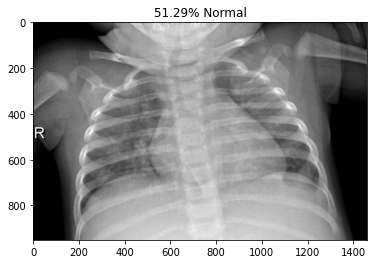

normal/NORMAL2-IM-1423-0001.jpeg


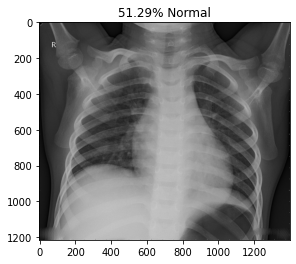

In [11]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 130 images belonging to 2 classes.
{'covid': 0, 'normal': 1}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  from ipykernel import kernelapp as app


130/130 [==============================] - 39s 278ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


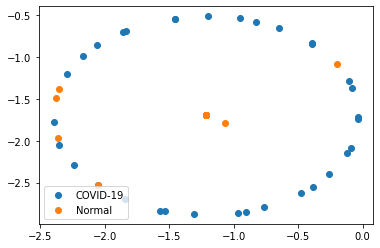

In [12]:

from sklearn.manifold import TSNE

intermediate_layer_model = models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_feature').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

#raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                          "and plot the resulting 2D features of the two classes.")

labels = tsne_data_generator.classes
print(tsne_data_generator.class_indices)

X = TSNE().fit_transform(intermediate_layer_model.predict_generator(tsne_data_generator, verbose=1))

classes = ["COVID-19", "Normal"]
for i in range(2):
    cluster = X[np.where(labels == i)]
    plt.scatter(cluster[:, 0], cluster[:, 1], label = classes[i])
plt.legend()


<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->